In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
print(df.isnull())               #shows true where values are missing
print(df.isnull().sum())         # count missing values per column  


     Transaction ID   Date  Customer ID  Gender    Age  Product Category  \
0             False  False        False   False  False             False   
1             False  False        False   False  False             False   
2             False  False        False   False  False             False   
3             False  False        False   False  False             False   
4             False  False        False   False  False             False   
..              ...    ...          ...     ...    ...               ...   
995           False  False        False   False  False             False   
996           False  False        False   False  False             False   
997           False  False        False   False  False             False   
998           False  False        False   False  False             False   
999           False  False        False   False  False             False   

     Quantity  Price per Unit  Total Amount  
0       False           False         Fal

In [4]:
df_no_duplicates = df.drop_duplicates(keep = False)
print(df_no_duplicates)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [5]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [6]:
df.duplicated().sum()


0

In [7]:
 df['Date'] = pd.to_datetime(df['Date'])
 print(df.to_string())

     Transaction ID       Date Customer ID  Gender  Age Product Category  Quantity  Price per Unit  Total Amount
0                 1 2023-11-24     CUST001    Male   34           Beauty         3              50           150
1                 2 2023-02-27     CUST002  Female   26         Clothing         2             500          1000
2                 3 2023-01-13     CUST003    Male   50      Electronics         1              30            30
3                 4 2023-05-21     CUST004    Male   37         Clothing         1             500           500
4                 5 2023-05-06     CUST005    Male   30           Beauty         2              50           100
5                 6 2023-04-25     CUST006  Female   45           Beauty         1              30            30
6                 7 2023-03-13     CUST007    Male   46         Clothing         2              25            50
7                 8 2023-02-22     CUST008    Male   30      Electronics         4              

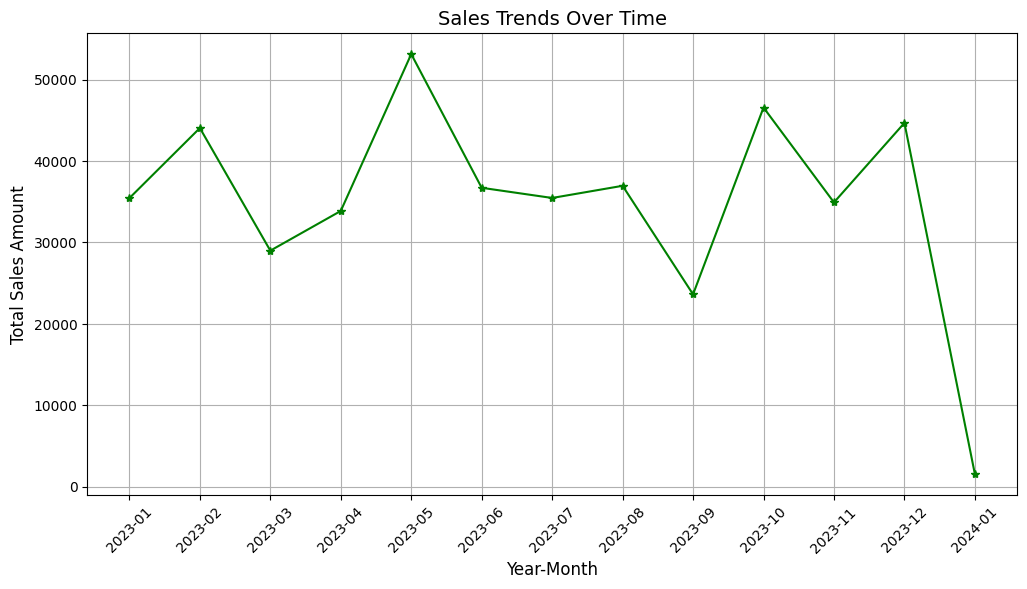

1

In [8]:
# 1. Analyze sales trends over time
df['YearMonth'] = df['Date'].dt.to_period('M')  # Grouping by Year and Month
sales_trends = df.groupby('YearMonth')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_trends['YearMonth'].astype(str), sales_trends['Total Amount'], marker='*', linestyle='-', color='g')
plt.title('Sales Trends Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()
1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   YearMonth         1000 non-null   period[M]     
dtypes: datetime64[ns](1), int64(5), object(3), period[M](1)
memory usage: 78.3+ KB


C:\Users\varsh\AppData\Local\Temp\ipykernel_9204\1675285889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Amount', y='Product Category', data=category_performance,palette='mako')


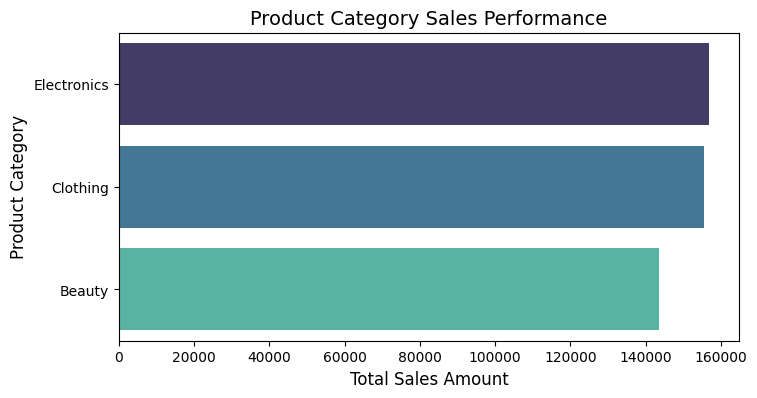

In [10]:
#2 Product Category Performance Analysis
category_performance = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='Total Amount', y='Product Category', data=category_performance,palette='mako')
plt.title('Product Category Sales Performance', fontsize=14)
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

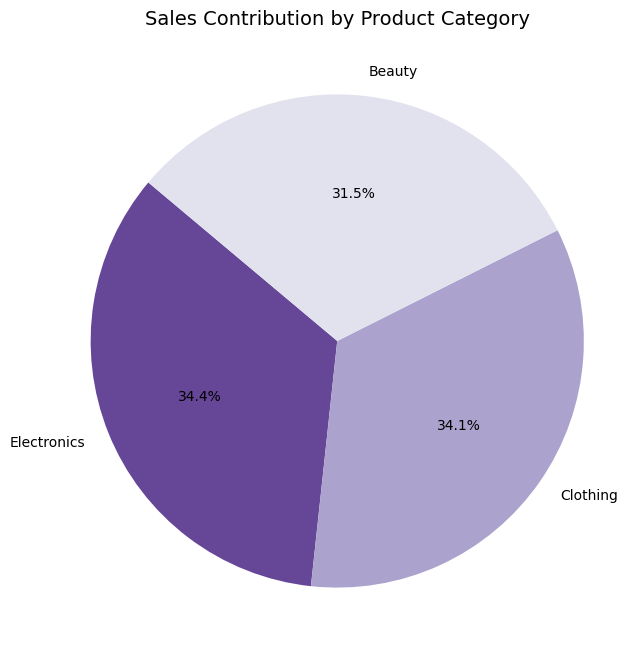

In [101]:
# Product Category Contribution (Pie Chart)
plt.figure(figsize=(7,8))
plt.pie(category_performance['Total Amount'], labels=category_performance['Product Category'],autopct = '%1.1f%%', startangle=140, colors=sns.color_palette('PuOr_r'))
plt.title('Sales Contribution by Product Category',fontsize=14)
plt.axis('equal')
plt.show()

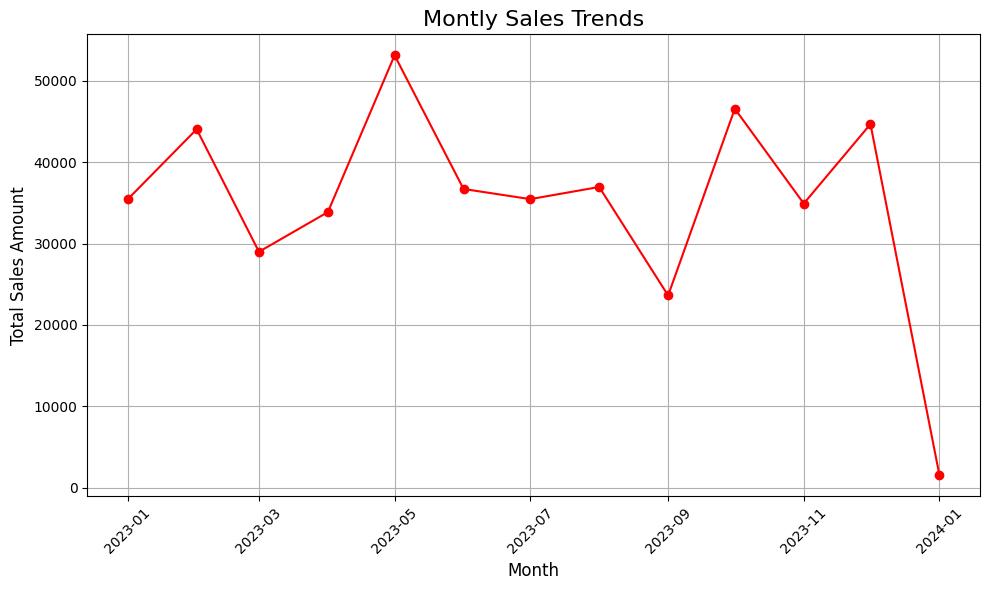

In [57]:
sales_trends = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()
sales_trends.index=sales_trends.index.to_timestamp()
plt.figure(figsize=(10,6))
plt.plot(sales_trends.index, sales_trends.values, marker='o', linestyle='-', color='red')
plt.title('Montly Sales Trends',fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


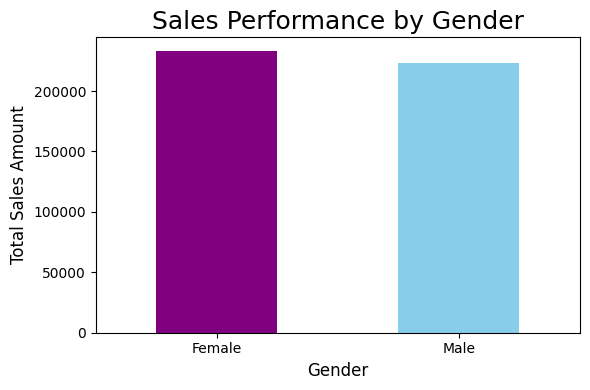

In [71]:
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6,4))
sales_by_gender.plot(kind = 'bar',color=['purple','skyblue'])
plt.title('Sales Performance by Gender',fontsize = 18)
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Total Sales Amount',fontsize = 12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

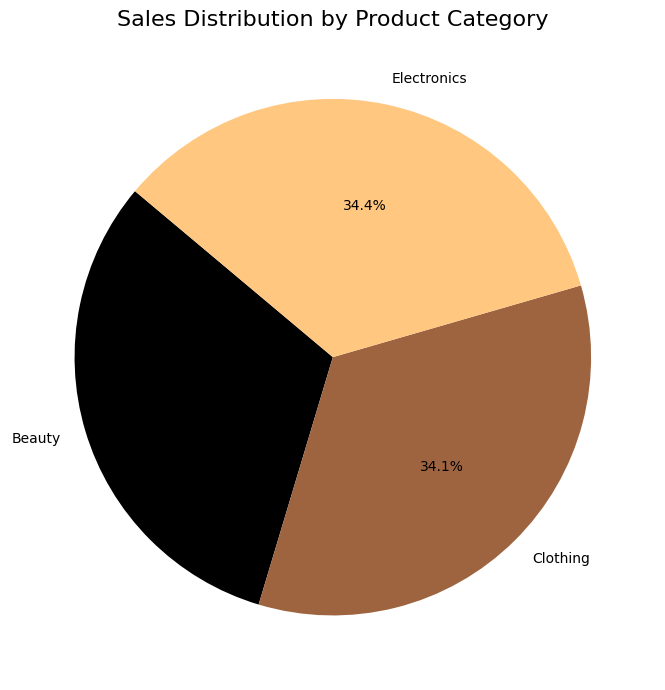

In [89]:
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(7,7))
sales_by_category.plot(kind = 'pie',autopct = '%1.1f%%',startangle =140,colormap = 'copper')
plt.title('Sales Distribution by Product Category',fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()